In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

In [2]:
# Load the data into data frames

d1 = pd.read_csv('office_environ_data_1.csv')

In [3]:
# The data reports the responses (on a scale of 1 to 10) of 100 office workers about their subjective feelings...
# ... of well-being in relation to their working environment.
# Information on the gender of respondents is provided, along with some indices to measure the greenery...
# ... of their environment (e.g. pot plants, views of trees) and the amount of natural light.

# Let's visualise the first few rows of each data set:

d1.head()

,gender,greenery index,natural light index,reported well-being
0,M,124.7,28.4,6
1,F,67.9,64.0,6
2,M,129.4,79.5,7
3,F,111.1,130.7,8
4,F,168.2,79.1,8


y = 0.014 x + 5.706
Rsq =  0.345235165782
p-value =  1.30754858938e-10


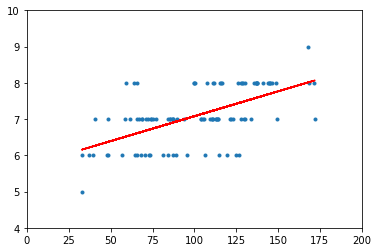

In [5]:
# This is a regression of well-being against greenery:

X = d1['greenery index']
Y = d1['reported well-being']

a = plt.plot(X,Y,'.')
plt.xlim(0,200)
plt.ylim(4,10)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r') # Plot the regression line.

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

y = 0.014 x + 5.634
Rsq =  0.410481587673
p-value =  7.02929172235e-13


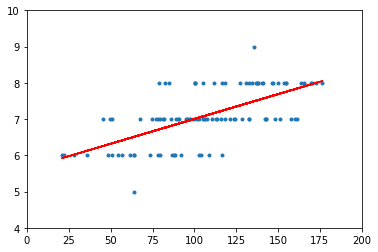

In [6]:
# This is a regression of well-being against natural light:

X = d1['natural light index']
Y = d1['reported well-being']

a = plt.plot(X,Y,'.')
plt.xlim(0,200)
plt.ylim(4,10)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r') # Plot the regression line.

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

In [7]:
# This package will allow for multilinear regression.
# If you do not have it, you can download it from here:
# http://statsmodels.sourceforge.net/install.html
# After installing, you may need to close and reopen Canopy or reboot your computer.

import statsmodels.formula.api as smf

In [9]:
# It turns out it's easier to work with columns with single word names, so...
d1 = d1.rename(columns = {'reported well-being':'wellbeing',
                          'greenery index':'greenery',
                          'natural light index':'light'})

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model_1 = smf.ols(formula='wellbeing ~ greenery + light',data=d1).fit()

# And this gives a big summary of the results:
print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              wellbeing   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           8.29e-30
Time:                        15:59:15   Log-Likelihood:                -48.146
No. Observations:                 100   AIC:                             102.3
Df Residuals:                      97   BIC:                             110.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2670      0.172     24.853      0.0

In [11]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2 = multi_regression_model_1.params
rsq                    = multi_regression_model_1.rsquared
pval_0, pval_1, pval_2 = multi_regression_model_1.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_0,3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))

y = 0.014 x1 + 0.014 x2 + 4.267
R^2     =  0.748588335477
p-value_1 =  0.0
p-value_2 =  0.0


In [12]:
# Now let's move on to an alternative version of the same data set:

d2 = pd.read_csv('office_environ_data_2.csv')
d2.head()

,gender,greenery index,natural light index,reported well-being
0,M,86.1,93.8,7
1,M,110.5,70.0,7
2,F,77.6,93.0,7
3,M,130.7,99.6,8
4,M,68.7,110.3,7


y = 0.019 x + 5.055
Rsq =  0.561033874644
p-value =  3.21002614461e-19


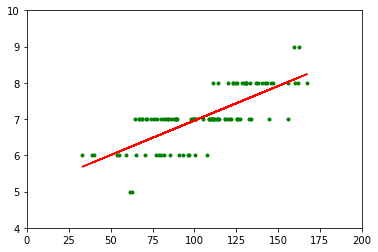

In [13]:
# This is a regression of well-being against greenery:

X = d2['greenery index']
Y = d2['reported well-being']

a = plt.plot(X,Y,'g.')
plt.xlim(0,200)
plt.ylim(4,10)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r') # Plot the regression line.

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

y = 0.019 x + 5.137
Rsq =  0.599178170721
p-value =  3.61575389149e-21


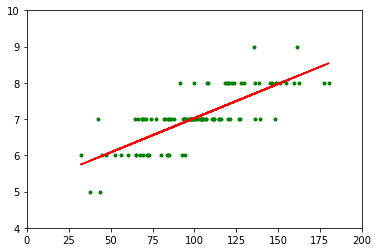

In [14]:
# This is a regression of well-being against natural light:

X = d2['natural light index']
Y = d2['reported well-being']

a = plt.plot(X,Y,'g.')
plt.xlim(0,200)
plt.ylim(4,10)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r') # Plot the regression line.

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

In [15]:
# Perform the multilinear regression:

d2 = d2.rename(columns = {'reported well-being':'wellbeing',
                          'greenery index':'greenery',
                          'natural light index':'light'})
multi_regression_model_2 = smf.ols(formula='wellbeing ~ greenery + light',data=d2).fit()

In [16]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2 = multi_regression_model_2.params
rsq                    = multi_regression_model_2.rsquared
pval_0, pval_1, pval_2 = multi_regression_model_2.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_0,3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))

y = 0.012 x1 + 0.013 x2 + 4.56
R^2     =  0.741004206603
p-value_1 =  0.0
p-value_2 =  0.0


y = 0.01 x + 105.976
Rsq =  9.13718302054e-05
p-value =  0.924800176063

Correlation between greenery and natural light indices: 0.01


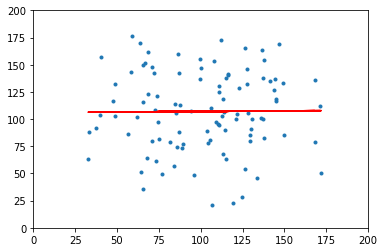

In [17]:
# The first data set showed Rsq values of approx. 30-40% when treating each variable separately...
# while the combined model showed an Rsq value of 75%.

# The second data set showed Rsq values of approx. 50-60% when treating each variable separately...
# while the combined model showed an Rsq value of 74%.

# To understand why, we look at the correlation between the explanatory variables in each data set.

# (The uncorrelated explanatory variables of set 1 provide completely independent information about well-being...
# ... while the correlated expl. variables of set 2 have an overlap in the information they provide...
# ... so there is not such a big improvement in Rsq in the combined model for set 2, as there was for set 1)

# Data set 1:

X = d1['greenery']
Y = d1['light']

a = plt.plot(X,Y,'.')
plt.xlim(0,200)
plt.ylim(0,200)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r') # Plot the regression line.

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)
print()
print("Correlation between greenery and natural light indices:", round(r_value,3))

y = 0.591 x + 39.401
Rsq =  0.321304180146
p-value =  7.8542077053e-10

Correlation between greenery and natural light indices: 0.567


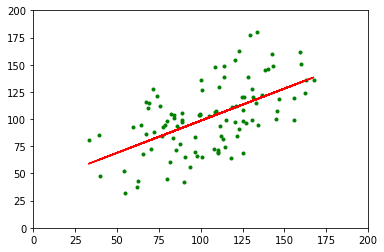

In [18]:
# Data set 2:

X = d2['greenery']
Y = d2['light']

a = plt.plot(X,Y,'g.')
plt.xlim(0,200)
plt.ylim(0,200)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r') # Plot the regression line.

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)
print()
print("Correlation between greenery and natural light indices:", round(r_value,3))

In [19]:
# Now to look at gender (in the first data set only)
# First, create a new column to convert the genders into 1s and 0s:

d1['gender_cat'] = 1*(d1['gender'] == 'M')

In [20]:
# Display the first few rows:

d1.head()

,gender,greenery,light,wellbeing,gender_cat
0,M,124.7,28.4,6,1
1,F,67.9,64.0,6,0
2,M,129.4,79.5,7,1
3,F,111.1,130.7,8,0
4,F,168.2,79.1,8,0


In [21]:
# Perform a multiple linear regression including gender.
# The p-value for gender is very high, indicating that it is very likely not to be linked to well-being.
# There does not seem to be any reason to include gender.

multi_regression_model_1A = smf.ols(formula='wellbeing ~ greenery + light + gender_cat',data=d1).fit()

beta_0, beta_1, beta_2, beta_3 = multi_regression_model_1A.params
rsq                            = multi_regression_model_1A.rsquared
pval_0, pval_1, pval_2, pval_3 = multi_regression_model_1A.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_3,3), "x3 +", round(beta_0,3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))
print("p-value_3 = ", round(pval_3,3))

y = 0.014 x1 + 0.014 x2 + 0.021 x3 + 4.256
R^2     =  0.748763383852
p-value_1 =  0.0
p-value_2 =  0.0
p-value_3 =  0.796
